In [40]:
!pip install opencv-python  

In [1]:
import os
import sys; sys.prefix
import numpy as np
import pickle
import cv2
import random
import matplotlib.pyplot as plt
print ("importation completed")

importation completed


C:\Users\wongt\Downloads\2021-09\lessthan5.19km\image21-09-01_09-45-00-91_00578.jpg
imgs completed
print completed


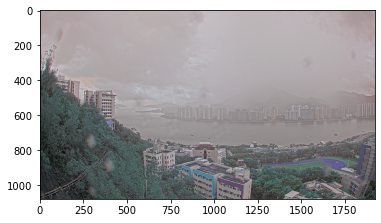

In [5]:
directory=r'C:\Users\wongt\Downloads\2021-09'
catergories=['lessthan5.19km','morethan5.19km']

for catergory in catergories:
    folder=os.path.join(directory,catergory)
    for img in os.listdir(folder):
        imgpath=os.path.join(folder,img)
        print(imgpath)
        imgs=cv2.imread(imgpath)
        print("imgs completed")
        plt.imshow(imgs)
        print("print completed")
        break
    break
    